In [0]:
import torch
import torchvision
import torch.optim as optim
import torch.nn.functional as F

In [0]:
# Define a transform to normalize the data
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [0]:
class LinearModel(torch.nn.Module):
  def __init__(self):
    super().__init__()

    #define linear models
    self.fc1 = torch.nn.Linear(784, 256)
    self.fc2 = torch.nn.Linear(256,200)
    self.fc3 = torch.nn.Linear(200,128)
    self.fc4 = torch.nn.Linear(128, 64)
    self.fc5 = torch.nn.Linear(64, 32)
    self.fc6 = torch.nn.Linear(32, 10)

    self.dropout = torch.nn.Dropout(p=0.5)

  def forward(self, x):
    #flattening
    x = x.reshape(x.shape[0], -1)

    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    x = self.dropout(F.relu(self.fc5(x)))
    
    x =F.log_softmax(self.fc6(x), dim=1)

    return x 



In [0]:
model = LinearModel()
model = model.to(device)

criterion = torch.nn.NLLLoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)

In [7]:
from tqdm import tqdm
epochs = 100

train_losses, test_losses = [], []
train_accuracy, test_accuracy = [], []
for e in tqdm(range(epochs)):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimiser.zero_grad()
        
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimiser.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)

                log_ps = model.forward(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        train_accuracy.append(1 - train_losses[-1])
        test_accuracy.append(accuracy/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Train Accuracy: {:.3f}".format(train_accuracy[-1]),
              "Test Accuracy: {:.3f}".format(test_accuracy[-1]))

  1%|          | 1/100 [00:17<28:44, 17.42s/it]

Epoch: 1/100..  Training Loss: 1.001..  Test Loss: 0.721..  Train Accuracy: -0.001 Test Accuracy: 0.700


  2%|▏         | 2/100 [00:34<28:12, 17.27s/it]

Epoch: 2/100..  Training Loss: 0.843..  Test Loss: 0.673..  Train Accuracy: 0.157 Test Accuracy: 0.741


  3%|▎         | 3/100 [00:51<27:41, 17.13s/it]

Epoch: 3/100..  Training Loss: 0.792..  Test Loss: 0.633..  Train Accuracy: 0.208 Test Accuracy: 0.739


  4%|▍         | 4/100 [01:08<27:20, 17.09s/it]

Epoch: 4/100..  Training Loss: 0.759..  Test Loss: 0.621..  Train Accuracy: 0.241 Test Accuracy: 0.769


  5%|▌         | 5/100 [01:24<26:54, 16.99s/it]

Epoch: 5/100..  Training Loss: 0.733..  Test Loss: 0.602..  Train Accuracy: 0.267 Test Accuracy: 0.768


  6%|▌         | 6/100 [01:41<26:34, 16.96s/it]

Epoch: 6/100..  Training Loss: 0.715..  Test Loss: 0.576..  Train Accuracy: 0.285 Test Accuracy: 0.784


  7%|▋         | 7/100 [01:58<26:17, 16.96s/it]

Epoch: 7/100..  Training Loss: 0.709..  Test Loss: 0.568..  Train Accuracy: 0.291 Test Accuracy: 0.786


  8%|▊         | 8/100 [02:15<26:03, 16.99s/it]

Epoch: 8/100..  Training Loss: 0.687..  Test Loss: 0.562..  Train Accuracy: 0.313 Test Accuracy: 0.790


  9%|▉         | 9/100 [02:32<25:48, 17.02s/it]

Epoch: 9/100..  Training Loss: 0.675..  Test Loss: 0.546..  Train Accuracy: 0.325 Test Accuracy: 0.790


 10%|█         | 10/100 [02:49<25:31, 17.01s/it]

Epoch: 10/100..  Training Loss: 0.666..  Test Loss: 0.525..  Train Accuracy: 0.334 Test Accuracy: 0.805


 11%|█         | 11/100 [03:06<25:15, 17.03s/it]

Epoch: 11/100..  Training Loss: 0.652..  Test Loss: 0.518..  Train Accuracy: 0.348 Test Accuracy: 0.813


 12%|█▏        | 12/100 [03:23<24:58, 17.02s/it]

Epoch: 12/100..  Training Loss: 0.657..  Test Loss: 0.507..  Train Accuracy: 0.343 Test Accuracy: 0.820


 13%|█▎        | 13/100 [03:41<24:42, 17.04s/it]

Epoch: 13/100..  Training Loss: 0.634..  Test Loss: 0.493..  Train Accuracy: 0.366 Test Accuracy: 0.828


 14%|█▍        | 14/100 [03:58<24:32, 17.13s/it]

Epoch: 14/100..  Training Loss: 0.623..  Test Loss: 0.478..  Train Accuracy: 0.377 Test Accuracy: 0.838


 15%|█▌        | 15/100 [04:15<24:11, 17.08s/it]

Epoch: 15/100..  Training Loss: 0.622..  Test Loss: 0.484..  Train Accuracy: 0.378 Test Accuracy: 0.840


 16%|█▌        | 16/100 [04:32<23:51, 17.04s/it]

Epoch: 16/100..  Training Loss: 0.611..  Test Loss: 0.493..  Train Accuracy: 0.389 Test Accuracy: 0.829


 17%|█▋        | 17/100 [04:49<23:33, 17.03s/it]

Epoch: 17/100..  Training Loss: 0.619..  Test Loss: 0.470..  Train Accuracy: 0.381 Test Accuracy: 0.830


 18%|█▊        | 18/100 [05:06<23:16, 17.04s/it]

Epoch: 18/100..  Training Loss: 0.615..  Test Loss: 0.474..  Train Accuracy: 0.385 Test Accuracy: 0.835


 19%|█▉        | 19/100 [05:23<22:58, 17.02s/it]

Epoch: 19/100..  Training Loss: 0.605..  Test Loss: 0.464..  Train Accuracy: 0.395 Test Accuracy: 0.836


 20%|██        | 20/100 [05:40<22:40, 17.00s/it]

Epoch: 20/100..  Training Loss: 0.593..  Test Loss: 0.471..  Train Accuracy: 0.407 Test Accuracy: 0.841


 21%|██        | 21/100 [05:57<22:23, 17.00s/it]

Epoch: 21/100..  Training Loss: 0.593..  Test Loss: 0.488..  Train Accuracy: 0.407 Test Accuracy: 0.834


 22%|██▏       | 22/100 [06:14<22:04, 16.98s/it]

Epoch: 22/100..  Training Loss: 0.584..  Test Loss: 0.471..  Train Accuracy: 0.416 Test Accuracy: 0.842


 23%|██▎       | 23/100 [06:31<21:48, 16.99s/it]

Epoch: 23/100..  Training Loss: 0.595..  Test Loss: 0.456..  Train Accuracy: 0.405 Test Accuracy: 0.839


 24%|██▍       | 24/100 [06:48<21:29, 16.97s/it]

Epoch: 24/100..  Training Loss: 0.583..  Test Loss: 0.464..  Train Accuracy: 0.417 Test Accuracy: 0.837


 25%|██▌       | 25/100 [07:05<21:15, 17.00s/it]

Epoch: 25/100..  Training Loss: 0.572..  Test Loss: 0.499..  Train Accuracy: 0.428 Test Accuracy: 0.831


 26%|██▌       | 26/100 [07:22<21:00, 17.03s/it]

Epoch: 26/100..  Training Loss: 0.570..  Test Loss: 0.453..  Train Accuracy: 0.430 Test Accuracy: 0.844


 27%|██▋       | 27/100 [07:39<20:43, 17.03s/it]

Epoch: 27/100..  Training Loss: 0.567..  Test Loss: 0.467..  Train Accuracy: 0.433 Test Accuracy: 0.842


 28%|██▊       | 28/100 [07:56<20:27, 17.05s/it]

Epoch: 28/100..  Training Loss: 0.575..  Test Loss: 0.463..  Train Accuracy: 0.425 Test Accuracy: 0.846


 29%|██▉       | 29/100 [08:13<20:10, 17.05s/it]

Epoch: 29/100..  Training Loss: 0.574..  Test Loss: 0.469..  Train Accuracy: 0.426 Test Accuracy: 0.838


 30%|███       | 30/100 [08:30<19:50, 17.01s/it]

Epoch: 30/100..  Training Loss: 0.570..  Test Loss: 0.459..  Train Accuracy: 0.430 Test Accuracy: 0.839


 31%|███       | 31/100 [08:47<19:33, 17.00s/it]

Epoch: 31/100..  Training Loss: 0.560..  Test Loss: 0.453..  Train Accuracy: 0.440 Test Accuracy: 0.847


 32%|███▏      | 32/100 [09:04<19:16, 17.01s/it]

Epoch: 32/100..  Training Loss: 0.561..  Test Loss: 0.436..  Train Accuracy: 0.439 Test Accuracy: 0.852


 33%|███▎      | 33/100 [09:21<18:57, 16.98s/it]

Epoch: 33/100..  Training Loss: 0.558..  Test Loss: 0.462..  Train Accuracy: 0.442 Test Accuracy: 0.841


 34%|███▍      | 34/100 [09:38<18:40, 16.98s/it]

Epoch: 34/100..  Training Loss: 0.555..  Test Loss: 0.452..  Train Accuracy: 0.445 Test Accuracy: 0.849


 35%|███▌      | 35/100 [09:55<18:20, 16.93s/it]

Epoch: 35/100..  Training Loss: 0.558..  Test Loss: 0.450..  Train Accuracy: 0.442 Test Accuracy: 0.851


 36%|███▌      | 36/100 [10:12<18:03, 16.93s/it]

Epoch: 36/100..  Training Loss: 0.556..  Test Loss: 0.442..  Train Accuracy: 0.444 Test Accuracy: 0.851


 37%|███▋      | 37/100 [10:28<17:43, 16.88s/it]

Epoch: 37/100..  Training Loss: 0.560..  Test Loss: 0.457..  Train Accuracy: 0.440 Test Accuracy: 0.845


 38%|███▊      | 38/100 [10:45<17:25, 16.86s/it]

Epoch: 38/100..  Training Loss: 0.549..  Test Loss: 0.448..  Train Accuracy: 0.451 Test Accuracy: 0.848


 39%|███▉      | 39/100 [11:02<17:09, 16.87s/it]

Epoch: 39/100..  Training Loss: 0.549..  Test Loss: 0.428..  Train Accuracy: 0.451 Test Accuracy: 0.857


 40%|████      | 40/100 [11:19<16:49, 16.83s/it]

Epoch: 40/100..  Training Loss: 0.550..  Test Loss: 0.472..  Train Accuracy: 0.450 Test Accuracy: 0.831


 41%|████      | 41/100 [11:36<16:30, 16.79s/it]

Epoch: 41/100..  Training Loss: 0.549..  Test Loss: 0.440..  Train Accuracy: 0.451 Test Accuracy: 0.849


 42%|████▏     | 42/100 [11:52<16:13, 16.79s/it]

Epoch: 42/100..  Training Loss: 0.548..  Test Loss: 0.437..  Train Accuracy: 0.452 Test Accuracy: 0.852


 43%|████▎     | 43/100 [12:09<15:56, 16.77s/it]

Epoch: 43/100..  Training Loss: 0.541..  Test Loss: 0.426..  Train Accuracy: 0.459 Test Accuracy: 0.856


 44%|████▍     | 44/100 [12:26<15:39, 16.77s/it]

Epoch: 44/100..  Training Loss: 0.540..  Test Loss: 0.426..  Train Accuracy: 0.460 Test Accuracy: 0.855


 45%|████▌     | 45/100 [12:42<15:20, 16.74s/it]

Epoch: 45/100..  Training Loss: 0.547..  Test Loss: 0.427..  Train Accuracy: 0.453 Test Accuracy: 0.855


 46%|████▌     | 46/100 [12:59<15:07, 16.80s/it]

Epoch: 46/100..  Training Loss: 0.540..  Test Loss: 0.432..  Train Accuracy: 0.460 Test Accuracy: 0.856


 47%|████▋     | 47/100 [13:16<14:50, 16.81s/it]

Epoch: 47/100..  Training Loss: 0.549..  Test Loss: 0.440..  Train Accuracy: 0.451 Test Accuracy: 0.856


 48%|████▊     | 48/100 [13:33<14:34, 16.81s/it]

Epoch: 48/100..  Training Loss: 0.532..  Test Loss: 0.429..  Train Accuracy: 0.468 Test Accuracy: 0.854


 49%|████▉     | 49/100 [13:50<14:19, 16.86s/it]

Epoch: 49/100..  Training Loss: 0.535..  Test Loss: 0.446..  Train Accuracy: 0.465 Test Accuracy: 0.853


 50%|█████     | 50/100 [14:07<14:03, 16.87s/it]

Epoch: 50/100..  Training Loss: 0.537..  Test Loss: 0.431..  Train Accuracy: 0.463 Test Accuracy: 0.856


 51%|█████     | 51/100 [14:24<13:48, 16.91s/it]

Epoch: 51/100..  Training Loss: 0.537..  Test Loss: 0.433..  Train Accuracy: 0.463 Test Accuracy: 0.853


 52%|█████▏    | 52/100 [14:41<13:32, 16.92s/it]

Epoch: 52/100..  Training Loss: 0.538..  Test Loss: 0.425..  Train Accuracy: 0.462 Test Accuracy: 0.852


 53%|█████▎    | 53/100 [14:58<13:14, 16.91s/it]

Epoch: 53/100..  Training Loss: 0.540..  Test Loss: 0.429..  Train Accuracy: 0.460 Test Accuracy: 0.851


 54%|█████▍    | 54/100 [15:15<12:58, 16.92s/it]

Epoch: 54/100..  Training Loss: 0.533..  Test Loss: 0.424..  Train Accuracy: 0.467 Test Accuracy: 0.854


 55%|█████▌    | 55/100 [15:32<12:41, 16.93s/it]

Epoch: 55/100..  Training Loss: 0.543..  Test Loss: 0.426..  Train Accuracy: 0.457 Test Accuracy: 0.857


 56%|█████▌    | 56/100 [15:48<12:23, 16.91s/it]

Epoch: 56/100..  Training Loss: 0.531..  Test Loss: 0.423..  Train Accuracy: 0.469 Test Accuracy: 0.860


 57%|█████▋    | 57/100 [16:05<12:07, 16.92s/it]

Epoch: 57/100..  Training Loss: 0.526..  Test Loss: 0.433..  Train Accuracy: 0.474 Test Accuracy: 0.853


 58%|█████▊    | 58/100 [16:22<11:51, 16.93s/it]

Epoch: 58/100..  Training Loss: 0.527..  Test Loss: 0.434..  Train Accuracy: 0.473 Test Accuracy: 0.854


 59%|█████▉    | 59/100 [16:39<11:34, 16.94s/it]

Epoch: 59/100..  Training Loss: 0.522..  Test Loss: 0.424..  Train Accuracy: 0.478 Test Accuracy: 0.855


 60%|██████    | 60/100 [16:56<11:17, 16.94s/it]

Epoch: 60/100..  Training Loss: 0.531..  Test Loss: 0.463..  Train Accuracy: 0.469 Test Accuracy: 0.856


 61%|██████    | 61/100 [17:13<11:02, 16.98s/it]

Epoch: 61/100..  Training Loss: 0.536..  Test Loss: 0.426..  Train Accuracy: 0.464 Test Accuracy: 0.853


 62%|██████▏   | 62/100 [17:30<10:45, 16.98s/it]

Epoch: 62/100..  Training Loss: 0.524..  Test Loss: 0.429..  Train Accuracy: 0.476 Test Accuracy: 0.855


 63%|██████▎   | 63/100 [17:47<10:28, 16.98s/it]

Epoch: 63/100..  Training Loss: 0.523..  Test Loss: 0.423..  Train Accuracy: 0.477 Test Accuracy: 0.859


 64%|██████▍   | 64/100 [18:04<10:11, 17.00s/it]

Epoch: 64/100..  Training Loss: 0.525..  Test Loss: 0.443..  Train Accuracy: 0.475 Test Accuracy: 0.850


 65%|██████▌   | 65/100 [18:21<09:54, 16.98s/it]

Epoch: 65/100..  Training Loss: 0.520..  Test Loss: 0.423..  Train Accuracy: 0.480 Test Accuracy: 0.858


 66%|██████▌   | 66/100 [18:38<09:38, 17.01s/it]

Epoch: 66/100..  Training Loss: 0.532..  Test Loss: 0.437..  Train Accuracy: 0.468 Test Accuracy: 0.856


 67%|██████▋   | 67/100 [18:55<09:21, 17.01s/it]

Epoch: 67/100..  Training Loss: 0.525..  Test Loss: 0.438..  Train Accuracy: 0.475 Test Accuracy: 0.854


 68%|██████▊   | 68/100 [19:13<09:05, 17.05s/it]

Epoch: 68/100..  Training Loss: 0.531..  Test Loss: 0.432..  Train Accuracy: 0.469 Test Accuracy: 0.852


 69%|██████▉   | 69/100 [19:29<08:47, 17.02s/it]

Epoch: 69/100..  Training Loss: 0.513..  Test Loss: 0.433..  Train Accuracy: 0.487 Test Accuracy: 0.856


 70%|███████   | 70/100 [19:46<08:29, 17.00s/it]

Epoch: 70/100..  Training Loss: 0.526..  Test Loss: 0.443..  Train Accuracy: 0.474 Test Accuracy: 0.846


 71%|███████   | 71/100 [20:03<08:12, 16.99s/it]

Epoch: 71/100..  Training Loss: 0.516..  Test Loss: 0.421..  Train Accuracy: 0.484 Test Accuracy: 0.856


 72%|███████▏  | 72/100 [20:20<07:55, 16.96s/it]

Epoch: 72/100..  Training Loss: 0.525..  Test Loss: 0.441..  Train Accuracy: 0.475 Test Accuracy: 0.853


 73%|███████▎  | 73/100 [20:37<07:37, 16.94s/it]

Epoch: 73/100..  Training Loss: 0.515..  Test Loss: 0.420..  Train Accuracy: 0.485 Test Accuracy: 0.862


 74%|███████▍  | 74/100 [20:54<07:19, 16.91s/it]

Epoch: 74/100..  Training Loss: 0.526..  Test Loss: 0.437..  Train Accuracy: 0.474 Test Accuracy: 0.855


 75%|███████▌  | 75/100 [21:11<07:03, 16.95s/it]

Epoch: 75/100..  Training Loss: 0.506..  Test Loss: 0.429..  Train Accuracy: 0.494 Test Accuracy: 0.857


 76%|███████▌  | 76/100 [21:28<06:46, 16.92s/it]

Epoch: 76/100..  Training Loss: 0.524..  Test Loss: 0.437..  Train Accuracy: 0.476 Test Accuracy: 0.856


 77%|███████▋  | 77/100 [21:45<06:28, 16.89s/it]

Epoch: 77/100..  Training Loss: 0.521..  Test Loss: 0.421..  Train Accuracy: 0.479 Test Accuracy: 0.859


 78%|███████▊  | 78/100 [22:02<06:11, 16.87s/it]

Epoch: 78/100..  Training Loss: 0.518..  Test Loss: 0.425..  Train Accuracy: 0.482 Test Accuracy: 0.860


 79%|███████▉  | 79/100 [22:18<05:54, 16.88s/it]

Epoch: 79/100..  Training Loss: 0.512..  Test Loss: 0.418..  Train Accuracy: 0.488 Test Accuracy: 0.860


 80%|████████  | 80/100 [22:35<05:37, 16.90s/it]

Epoch: 80/100..  Training Loss: 0.515..  Test Loss: 0.428..  Train Accuracy: 0.485 Test Accuracy: 0.855


 81%|████████  | 81/100 [22:52<05:20, 16.89s/it]

Epoch: 81/100..  Training Loss: 0.518..  Test Loss: 0.426..  Train Accuracy: 0.482 Test Accuracy: 0.861


 82%|████████▏ | 82/100 [23:09<05:03, 16.88s/it]

Epoch: 82/100..  Training Loss: 0.504..  Test Loss: 0.418..  Train Accuracy: 0.496 Test Accuracy: 0.862


 83%|████████▎ | 83/100 [23:26<04:46, 16.87s/it]

Epoch: 83/100..  Training Loss: 0.522..  Test Loss: 0.438..  Train Accuracy: 0.478 Test Accuracy: 0.855


 84%|████████▍ | 84/100 [23:43<04:29, 16.86s/it]

Epoch: 84/100..  Training Loss: 0.525..  Test Loss: 0.498..  Train Accuracy: 0.475 Test Accuracy: 0.836


 85%|████████▌ | 85/100 [24:00<04:12, 16.84s/it]

Epoch: 85/100..  Training Loss: 0.521..  Test Loss: 0.425..  Train Accuracy: 0.479 Test Accuracy: 0.858


 86%|████████▌ | 86/100 [24:16<03:55, 16.86s/it]

Epoch: 86/100..  Training Loss: 0.512..  Test Loss: 0.418..  Train Accuracy: 0.488 Test Accuracy: 0.861


 87%|████████▋ | 87/100 [24:33<03:39, 16.85s/it]

Epoch: 87/100..  Training Loss: 0.506..  Test Loss: 0.432..  Train Accuracy: 0.494 Test Accuracy: 0.853


 88%|████████▊ | 88/100 [24:50<03:22, 16.83s/it]

Epoch: 88/100..  Training Loss: 0.506..  Test Loss: 0.432..  Train Accuracy: 0.494 Test Accuracy: 0.856


 89%|████████▉ | 89/100 [25:07<03:05, 16.84s/it]

Epoch: 89/100..  Training Loss: 0.508..  Test Loss: 0.431..  Train Accuracy: 0.492 Test Accuracy: 0.860


 90%|█████████ | 90/100 [25:24<02:48, 16.80s/it]

Epoch: 90/100..  Training Loss: 0.523..  Test Loss: 0.430..  Train Accuracy: 0.477 Test Accuracy: 0.858


 91%|█████████ | 91/100 [25:40<02:30, 16.76s/it]

Epoch: 91/100..  Training Loss: 0.509..  Test Loss: 0.430..  Train Accuracy: 0.491 Test Accuracy: 0.857


 92%|█████████▏| 92/100 [25:57<02:14, 16.78s/it]

Epoch: 92/100..  Training Loss: 0.515..  Test Loss: 0.435..  Train Accuracy: 0.485 Test Accuracy: 0.859


 93%|█████████▎| 93/100 [26:14<01:57, 16.80s/it]

Epoch: 93/100..  Training Loss: 0.499..  Test Loss: 0.436..  Train Accuracy: 0.501 Test Accuracy: 0.862


 94%|█████████▍| 94/100 [26:31<01:40, 16.79s/it]

Epoch: 94/100..  Training Loss: 0.527..  Test Loss: 0.437..  Train Accuracy: 0.473 Test Accuracy: 0.852


 95%|█████████▌| 95/100 [26:47<01:23, 16.76s/it]

Epoch: 95/100..  Training Loss: 0.521..  Test Loss: 0.422..  Train Accuracy: 0.479 Test Accuracy: 0.860


 96%|█████████▌| 96/100 [27:04<01:07, 16.76s/it]

Epoch: 96/100..  Training Loss: 0.516..  Test Loss: 0.421..  Train Accuracy: 0.484 Test Accuracy: 0.857


 97%|█████████▋| 97/100 [27:21<00:50, 16.76s/it]

Epoch: 97/100..  Training Loss: 0.503..  Test Loss: 0.428..  Train Accuracy: 0.497 Test Accuracy: 0.861


 98%|█████████▊| 98/100 [27:38<00:33, 16.79s/it]

Epoch: 98/100..  Training Loss: 0.502..  Test Loss: 0.438..  Train Accuracy: 0.498 Test Accuracy: 0.861


 99%|█████████▉| 99/100 [27:55<00:16, 16.80s/it]

Epoch: 99/100..  Training Loss: 0.509..  Test Loss: 0.422..  Train Accuracy: 0.491 Test Accuracy: 0.862


100%|██████████| 100/100 [28:11<00:00, 16.76s/it]

Epoch: 100/100..  Training Loss: 0.506..  Test Loss: 0.459..  Train Accuracy: 0.494 Test Accuracy: 0.852


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

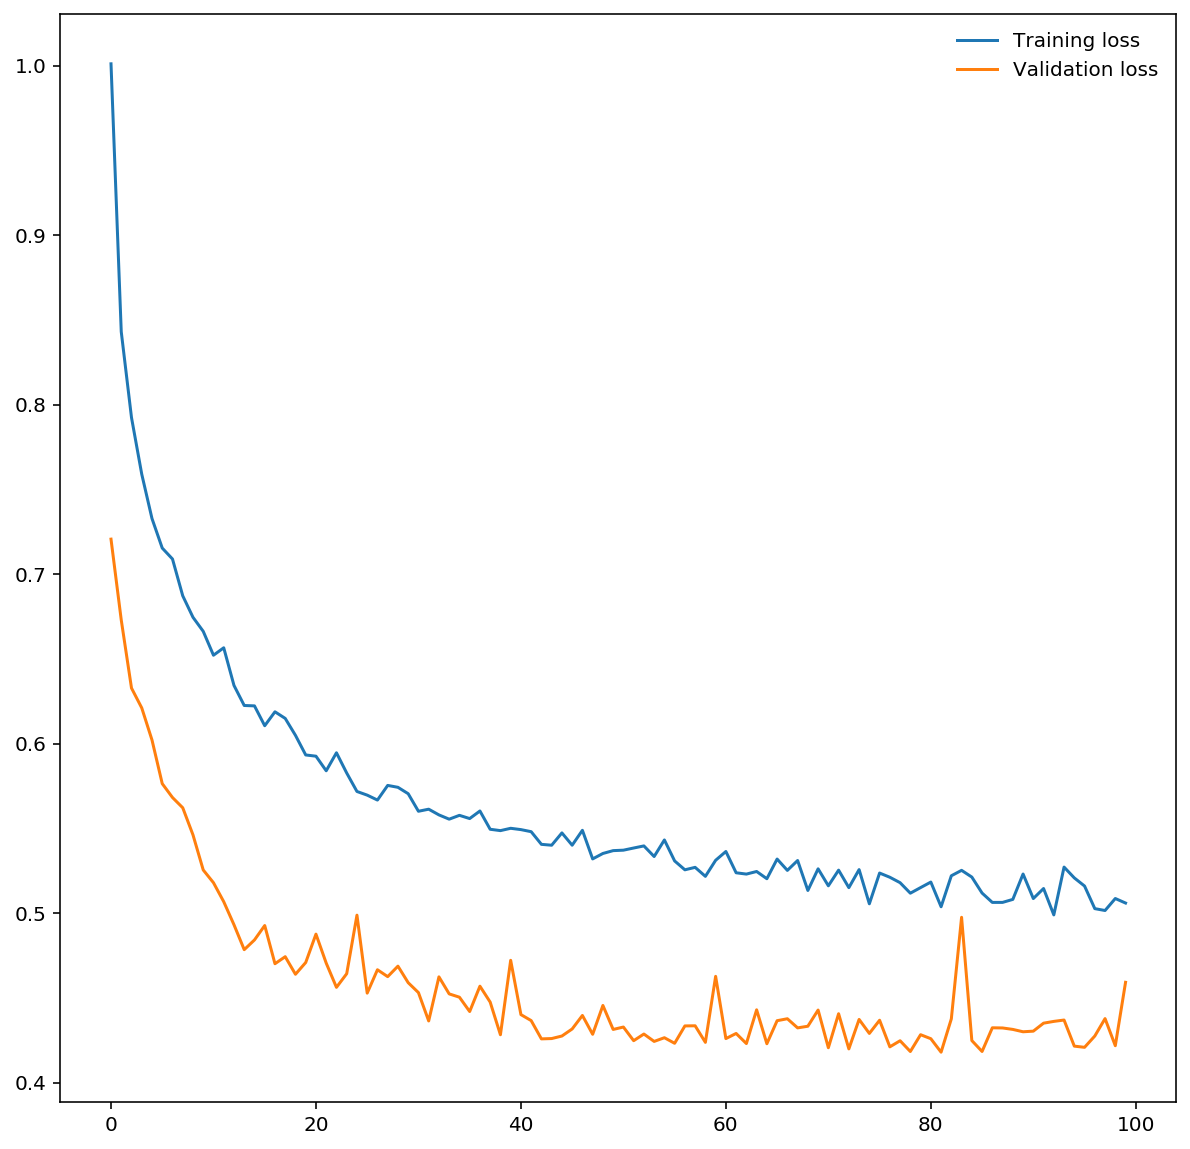

In [9]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

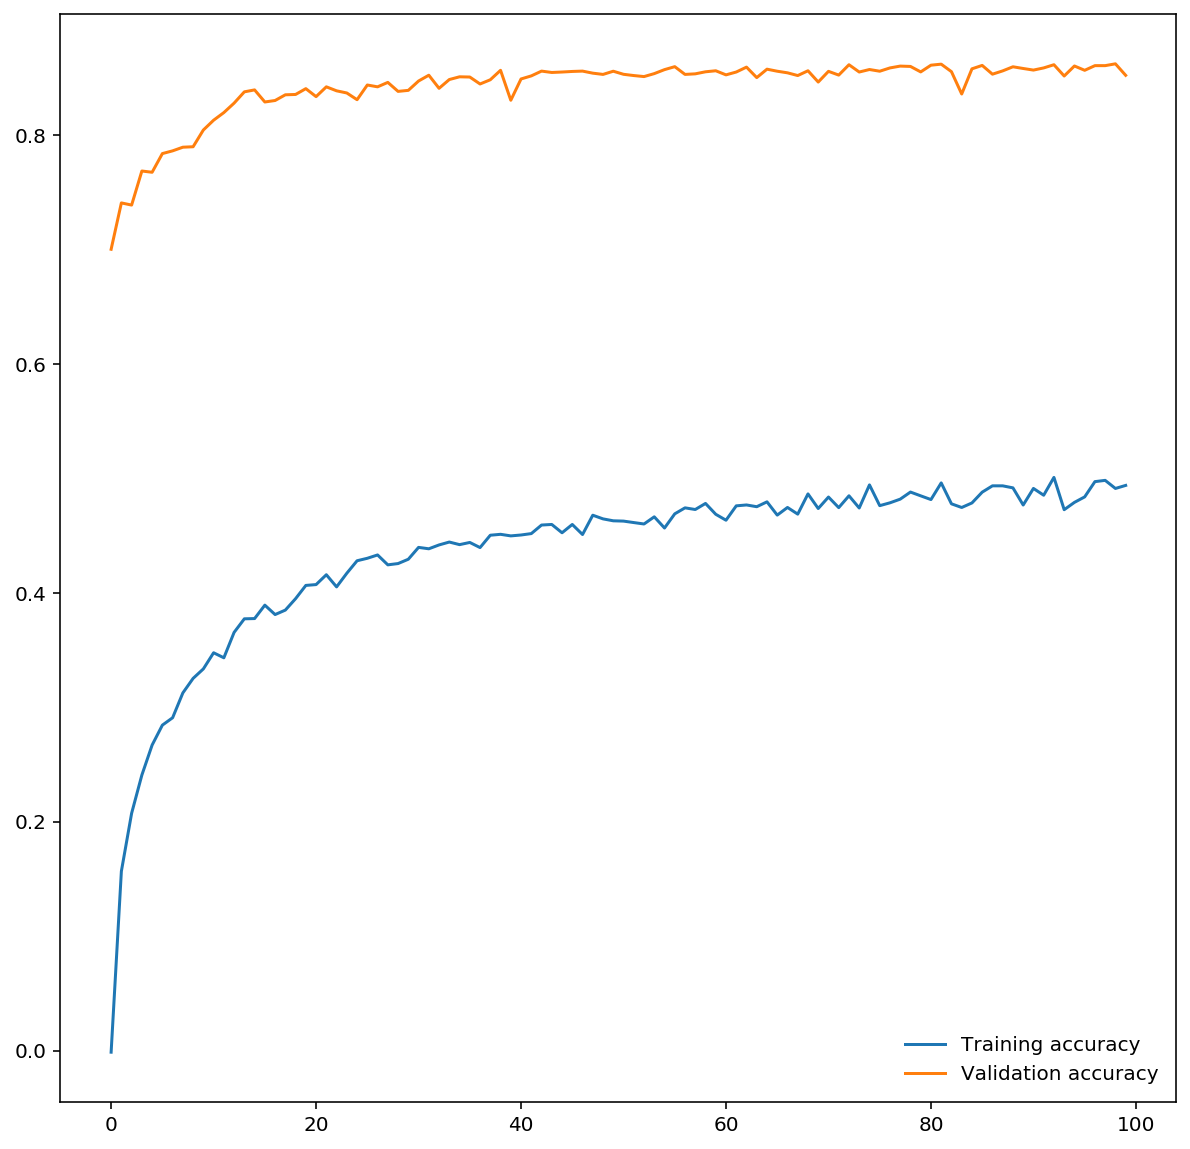

In [10]:
plt.figure(figsize=(10,10))
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Validation accuracy')
plt.legend(frameon=False)

In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    import numpy as np
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

Shirt


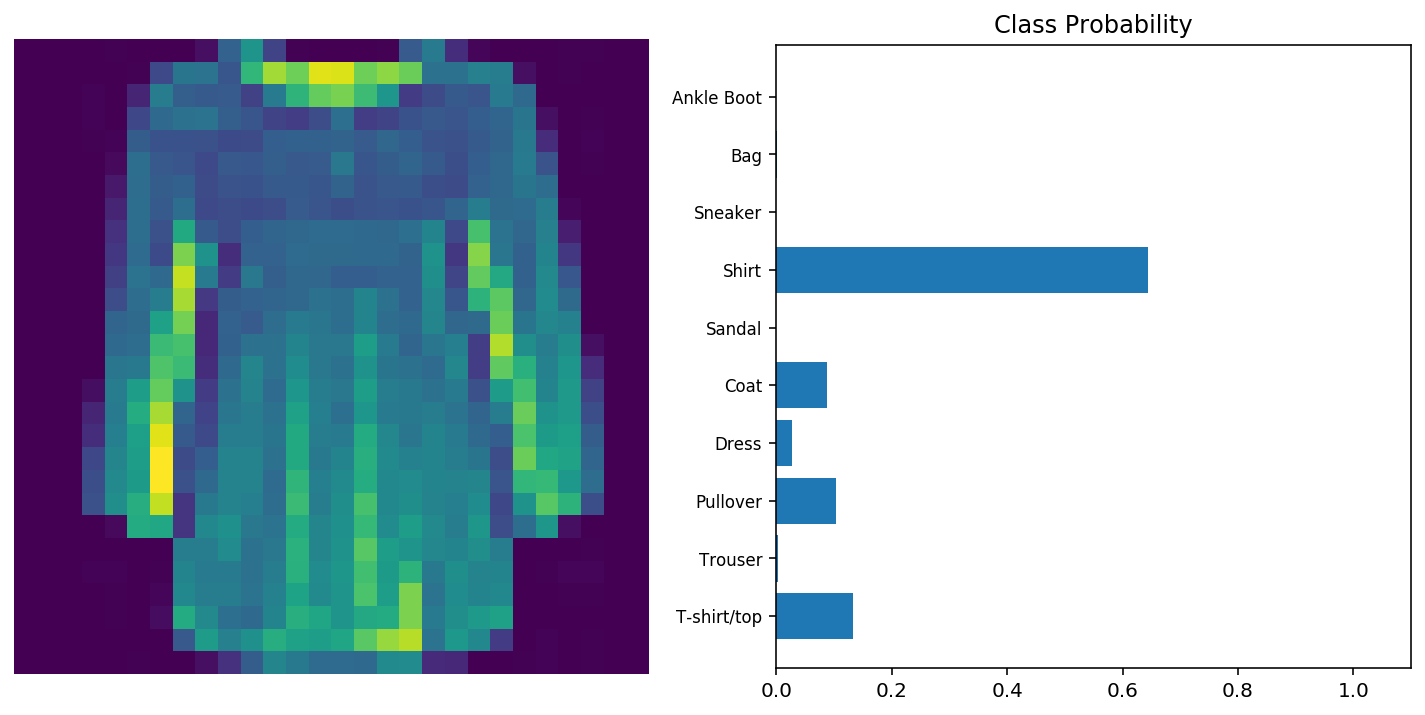

In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

model = model.cpu( )
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')
cat = ['T-shirt/top','Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot']
print(cat[labels[1]])